# Demonstration of the evaluation framework

This notebook contains some examples of how to build the incremental charts
and how to use the methods.

In [1]:
import numpy as np

from inceval.incoutputs import IncOutputs
from inceval.incdataset import IncData
from inceval.aux import GOLD, SILVER

## Building the incremental charts
Creating an incremental chart step by step. We'll build the chart for a sequence
of 10 tokens, using a gold standard and passing the recomputation time steps:

In [2]:
recomputations = np.array([False, False, True, True, True,
                           False, True, True, True, True])

gold = [1, 2, 1, 3, 1, 2, 2, 3, 1, 2]
# initialise the chart
outputs = IncOutputs(10, gold=gold, recomputations=recomputations, eval_mode=GOLD)
# add prefix by prefix to the chart
outputs.add_prefix(0, [1])
outputs.add_prefix(1, [1, 2])
outputs.add_prefix(2, [1, 1, 3])
outputs.add_prefix(3, [1, 1, 3, 2])
outputs.add_prefix(4, [1, 2, 1, 3, 1])
outputs.add_prefix(5, [1, 2, 1, 1, 3, 2])
outputs.add_prefix(6, [1, 2, 2, 1, 3, 1, 1])
outputs.add_prefix(7, [1, 2, 1, 1, 3, 1, 1, 3])
outputs.add_prefix(8, [1, 2, 1, 1, 3, 1, 1, 2, 1])
outputs.add_prefix(9, [1, 2, 1, 1, 3, 2, 2, 3, 1, 1])

Once the final step gets added, all further internal computations are done to 
build the edit chart and characterise edits and revisions. These structures are
all lower triangular matrices where each row represents a time step and each
column represents a token position.

The prefixes of labels are saved in the ```chart``` attribute:

In [3]:
outputs.chart

array([[1, inf, inf, inf, inf, inf, inf, inf, inf, inf],
       [1, 2, inf, inf, inf, inf, inf, inf, inf, inf],
       [1, 1, 3, inf, inf, inf, inf, inf, inf, inf],
       [1, 1, 3, 2, inf, inf, inf, inf, inf, inf],
       [1, 2, 1, 3, 1, inf, inf, inf, inf, inf],
       [1, 2, 1, 1, 3, 2, inf, inf, inf, inf],
       [1, 2, 2, 1, 3, 1, 1, inf, inf, inf],
       [1, 2, 1, 1, 3, 1, 1, 3, inf, inf],
       [1, 2, 1, 1, 3, 1, 1, 2, 1, inf],
       [1, 2, 1, 1, 3, 2, 2, 3, 1, 1]], dtype=object)

The edits are represented by the ```edits``` attribute with the flag 1.

In [4]:
outputs.edits

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 1.]])

The attribute ```edit_qualities.chartedit_qualities.chart``` stores the characterised edits.

In [5]:
outputs.edit_qualities.chart

array([[None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None,
        EditQualities(range_param=2, effective=False, defective=True, ineffective=False, convenient=False, inconvenient=True, innovative=True, repetitive=False, recurrent=False, steady=True, oscillating=True, stable=False, connected=False, disconnected=True, accompanied=False, isolated=True, short=True, long=False, temporary=True, definite=False, intermediate=True, final=False),
        None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None, None, None],
       [None,
        EditQualities(range_param=2, effective=True, defective=False, ineffective=False, convenient=True, inconvenient=False, innovative=False, repetitive=True, recurrent=False, steady=True, oscillating=True, stable=False, connected=True, disconnected=False, accompanied=True, isolated=False, short=False, long=True, temporary

The attribute ```revision_qualities.seq``` stores all the characterised revisions:

In [6]:
outputs.revision_qualities.seq

array([None, None,
       RevisionQualities(range_param=2, effective=False, defective=True, ineffective=False, convenient=False, inconvenient=True, recurrent=False, steady=True, oscillating=True, stable=False, isolated_edit=True, accompanied_edits=False, disconnected_edits=True, connected_edits=False, dis_and_connected_edits=False, short_range=True, long_range=False, short_and_long_range=False, definite=False, temporary=True, intermediate=True, final=False),
       None,
       RevisionQualities(range_param=2, effective=True, defective=False, ineffective=False, convenient=True, inconvenient=False, recurrent=True, steady=False, oscillating=True, stable=False, isolated_edit=False, accompanied_edits=True, disconnected_edits=False, connected_edits=True, dis_and_connected_edits=False, short_range=False, long_range=False, short_and_long_range=True, definite=False, temporary=True, intermediate=True, final=False),
       RevisionQualities(range_param=2, effective=False, defective=True, ineffec

To visualise the incremental chart, we need to pass the list of tokens and the figure size as parameters:

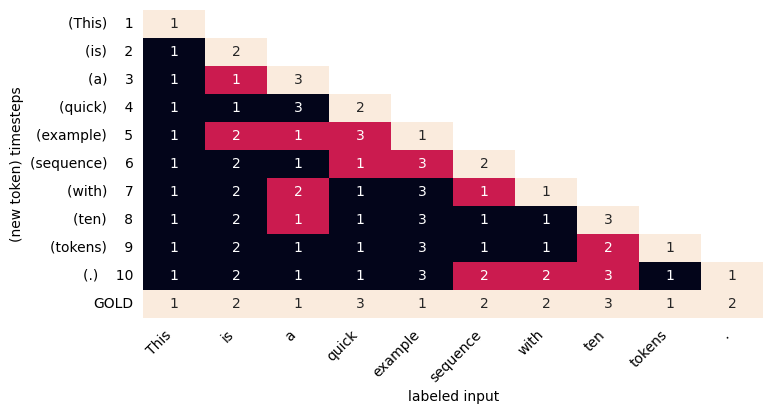

In [7]:
sentence = ['This', 'is', 'a', 'quick', 'example', 'sequence', 'with', 'ten', 'tokens', '.']
outputs.plot_inc_chart(sentence, (8, 4))

Alternatively, if all output prefixes are already available, we can create the chart at once. Here, we use the final output as a silver standard and no recomputations:

In [8]:
outputs_2 = IncOutputs(5, eval_mode=SILVER)
outputs_2.add_all_prefixes(np.array([
    [1, np.inf, np.inf, np.inf, np.inf],
    [3, 2,      np.inf, np.inf, np.inf],
    [1, 2,      1,      np.inf, np.inf],
    [2, 2,      3,      1,      np.inf],
    [2, 2,      3,      1,      3],
]))

## Computing metrics on sequence level

The ```IncOutputs``` object has several methods to compute various evaluation metrics:

In [9]:
print('Number of tokens: ', outputs.n_tokens)
print('Final accuracy: ', outputs.final_accuracy)
print('Accuracy by turn: ', outputs.accuracy_by_turn, '\n')

print('Revision timesteps: ', outputs.revision_timesteps)
print('Addition timesteps: ', outputs.write_timesteps)
print('Correct prefixes: ', outputs.correct_prefixes)
print('Incorrect prefixes: ', outputs.incorrect_prefixes, '\n')

print('Number of correct prefixes: ', outputs.n_correct_prefixes)
print('Number of correct acted upon prefixes: ', outputs.n_correct_acted_prefixes)
print('% of correct prefixes: ', outputs.perc_correct_prefixes)
print('Number of incorrect prefixes: ', outputs.n_incorrect_prefixes)
print('Number of incorrect acted upon prefixes: ', outputs.n_incorrect_acted_prefixes)
print('% of incorrect prefixes: ', outputs.perc_incorrect_prefixes, '\n')

print('Number of revisions: ', outputs.n_revisions)
print('% of revisions: ', outputs.perc_revisions)
print('Number of recomputations: ', outputs.n_recomputations)
print('% of recomputations: ', outputs.perc_recomputations)
print('Recomputation time steps: ', outputs.recomputation_timesteps)
print('Number of active recomputations: ', outputs.n_active_recomputations)
print('% of active recomputations: ', outputs.perc_active_recomputations)
print('Number of inactive recomputations: ', outputs.n_inactive_recomputations)
print('% of inactive recomputations: ', outputs.perc_inactive_recomputations)
print('Number of additions: ', outputs.n_writes)
print('% of additions: ', outputs.perc_writes)

print('Number of revisions on correct prefixes: ', outputs.n_revision_and_correct_prefix)
print('Number of revisions on incorrect prefixes: ', outputs.n_revision_and_incorrect_prefix)
print('Number of additions on correct prefixes: ', outputs.n_write_and_correct_prefix)
print('Number of additions on incorrect prefixes: ', outputs.n_write_and_incorrect_prefix, '\n')

print('R-pertinence: ', outputs.r_pertinence)
print('R-pertinence (complement): ', outputs.r_pertinence_complement)
print('A-pertinence: ', outputs.a_pertinence)
print('A-pertinence (complement): ', outputs.a_pertinence_complement, '\n')

print('R-appropriateness: ', outputs.r_appropriateness)
print('R-appropriateness (complement): ', outputs.r_appropriateness_complement)
print('A-appropriateness: ', outputs.a_appropriateness)
print('A-appropriateness (complement): ', outputs.a_appropriateness_complement, '\n')

print('Edit Overhead: ', outputs.edit_overhead)
print('Edit Overhead D1: ', outputs.delayed_edit_overhead(1))
print('Edit OverheadD2: ', outputs.delayed_edit_overhead(2))
print('Relative correctness: ', outputs.relative_correctness)

print('Total edits: ', outputs.n_total_edits)
print('% edits: ', outputs.perc_total_edits)
print('Edits per token: ', outputs.n_edits_per_token)
print('% edits per token: ', outputs.perc_edits_per_token)
print('Edits per time step: ', outputs.n_edits_per_timestep)
print('% edits per time step: ', outputs.perc_edits_per_timestep)
print('Edits per revision: ', outputs.n_edits_per_revision)
print('Edit groups per time step: ', outputs.n_edit_groups_per_timestep)
print('Edit groups per revision: ', outputs.n_edit_groups_per_revision)
print('Edit distances: ', outputs.edit_distances, '\n')

print('Label diversity', outputs.label_diversity_per_token)



Number of tokens:  10
Final accuracy:  0.7
Accuracy by turn:  [1.         1.         0.33333333 0.25       1.         0.66666667
 0.28571429 0.5        0.44444444 0.7       ] 

Revision timesteps:  [2, 4, 5, 6, 7, 8, 9]
Addition timesteps:  [0, 1, 3]
Correct prefixes:  [0, 1, 4]
Incorrect prefixes:  [2, 3, 5, 6, 7, 8, 9] 

Number of correct prefixes:  3
Number of correct acted upon prefixes:  4
% of correct prefixes:  30.0
Number of incorrect prefixes:  7
Number of incorrect acted upon prefixes:  6
% of incorrect prefixes:  70.0 

Number of revisions:  7
% of revisions:  70.0
Number of recomputations:  7
% of recomputations:  70.0
Recomputation time steps:  [2, 3, 4, 6, 7, 8, 9]
Number of active recomputations:  6
% of active recomputations:  85.71428571428571
Number of inactive recomputations:  1
% of inactive recomputations:  14.285714285714286
Number of additions:  3
% of additions:  30.0
Number of revisions on correct prefixes:  2
Number of revisions on incorrect prefixes:  5
Numbe

/Users/brie/Documents/revi-eval/inceval/incoutputs.py:553: RuntimeWarning: invalid value encountered in divide
  return 100 * self.n_edits_per_token / self.possible_edits_per_token
/Users/brie/Documents/revi-eval/inceval/incoutputs.py:563: RuntimeWarning: invalid value encountered in divide
  return 100 * (self.n_edits_per_timestep


## Computing metrics on dataset level

The main metrics can also be computed on dataset level, by counting the number of revisions, edits, correct and incorrect prefixes etc over all the tokens in the dataset. For that, we first create a dictionary mapping sequence IDs to sequence ```IncOutputs``` and then use the methods in ```IncData```.

In [10]:
recomputations = np.array([True, False, True, False, True])
gold = [3, 2, 3, 2, 1]
# initialise the chart
outputs_3 = IncOutputs(5, gold=gold, recomputations=recomputations, eval_mode=GOLD)
# add prefix by prefix to the chart
outputs_3.add_prefix(0, [3])
outputs_3.add_prefix(1, [3, 2])
outputs_3.add_prefix(2, [1, 3, 3])
outputs_3.add_prefix(3, [1, 1, 3, 1])
outputs_3.add_prefix(4, [3, 1, 2, 2, 1])


recomputations = np.array([True, True, True])
gold = [2, 2, 1]
# initialise the chart
outputs_4 = IncOutputs(3, gold=gold, recomputations=recomputations, eval_mode=GOLD)
# add prefix by prefix to the chart
outputs_4.add_prefix(0, [2])
outputs_4.add_prefix(1, [2, 2])
outputs_4.add_prefix(2, [2, 1, 1])

Create the incremental dataset:

In [11]:
outputs_dic = {1: outputs, 2: outputs_3, 3: outputs_4}
dataset = IncData(outputs_dic)

The distribution of effective edits:

In [12]:
dataset.edits_with_quality('effective')

[7, 2, 0]

A metric computed over all tokens:

In [13]:
dataset.r_appropriateness

0.875

In [14]:
dataset.get_dist('r_appropriateness')

[0.8333333333333334, 1.0, nan]

We can also compute the mean/std per sequence of an attribute. ```nan``` values
are ignored when computing ```get_mean``` and ```get_std```.

In [15]:
dataset.get_mean('r_appropriateness')

0.9166666666666667